## **DSCI 100 010 | Group 14**

**By Tejas Shanbhag, Heeya Chung, Chloe Aw, Shresth Agarwal**

## Introduction

Counterfeit currency is a significant concern in financial systems posing risks to economic stability and trust. With technological advancements it has become more challenging to distinguish between genuine and fake bills because of the increasing efforts in replication. 

Differentiating between real and fake bills can be accomplished through the use of the various measurements of the bills, including factors such as each bill’s length and height on both the left and right side of the bill. These measurements are taken in millimeters. 
Therefore, using the ‘Fake Bills’ dataset, the question we are going to answer using the dataset is: **Is a bill real or fake, given a specific left and right height, lower and higher margins, and length of the bill?** We chose these variables because they have shown the strongest relationship with the detection of genuine bills based on the graphs we have created and analyzed during out exploaratory data analysis. 

The **Fake Bills Dataset** was uploaded by Dawn Daras on the Kaggle website: https://www.kaggle.com/datasets/dawndarasms/fakebills?rvi=1. This dataset consists of the mentioned measurements and additional measurements below taken from both real and fake bills which can be used to differentiate between the two classes.

## Exploratory Data Analysis

In [1]:
library(tidyverse)  # for general tidyverse functions
library(tidymodels) # for making the training/testing split
library(ggplot2)    # for making the box plots
library(cowplot)    # for arranging the plots in a grid
library(repr)       # for adjusting plot proportions using options

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
fake_bills <- read_csv("https://raw.githubusercontent.com/heeyachung/dsci-group-14-/main/fakebills.csv") |> #reading the file
    mutate(is_genuine = as_factor(is_genuine)) |> #factoring the legitimacy variable
    mutate(is_genuine = fct_recode(is_genuine, "real" = "1", "fake" = "2")) #renaming values

#splitting the data into the training and testing split
fake_bills_split <- initial_split(fake_bills, prop = 0.75, strata = is_genuine)
bills_training <- training(fake_bills_split)
bills_testing <- testing(fake_bills_split)
head(bills_training)

# exploratory data analysis has been been done briefly following the boxplots below

Rows: 1500 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (7): is_genuine, diagonal, height_left, height_right, margin_low, margin...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fake,172.28,103.95,103.91,4.78,3.31,111.40
fake,171.59,104.14,104.38,4.97,3.47,111.22
fake,172.02,104.33,104.33,5.19,3.21,111.99
fake,172.55,104.25,104.23,5.60,3.13,111.72
fake,171.83,104.13,104.52,4.94,3.27,111.72
fake,172.30,104.28,103.90,5.10,3.57,110.66


*Figure 1: First 6 values of the training data set*

In [50]:
bills_means <- bills_training |>
    select(!is_genuine) |>
    map_df(mean, na.rm = TRUE)
bills_means

diagonal,height_left,height_right,margin_low,margin_up,length
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
171.9498,104.0225,103.9178,4.491349,3.150507,112.678


*Figure 2: Mean values of all predictor variables*

In [51]:
bills_class <- bills_training |>
    group_by(is_genuine) |>
    summarize(count = n()) 
bills_class

is_genuine,count
<fct>,<int>
real,750
fake,375


*Figure 3: Counts of the real and fake bills*

Warning message:
“Removed 30 rows containing non-finite values (`stat_boxplot()`).”


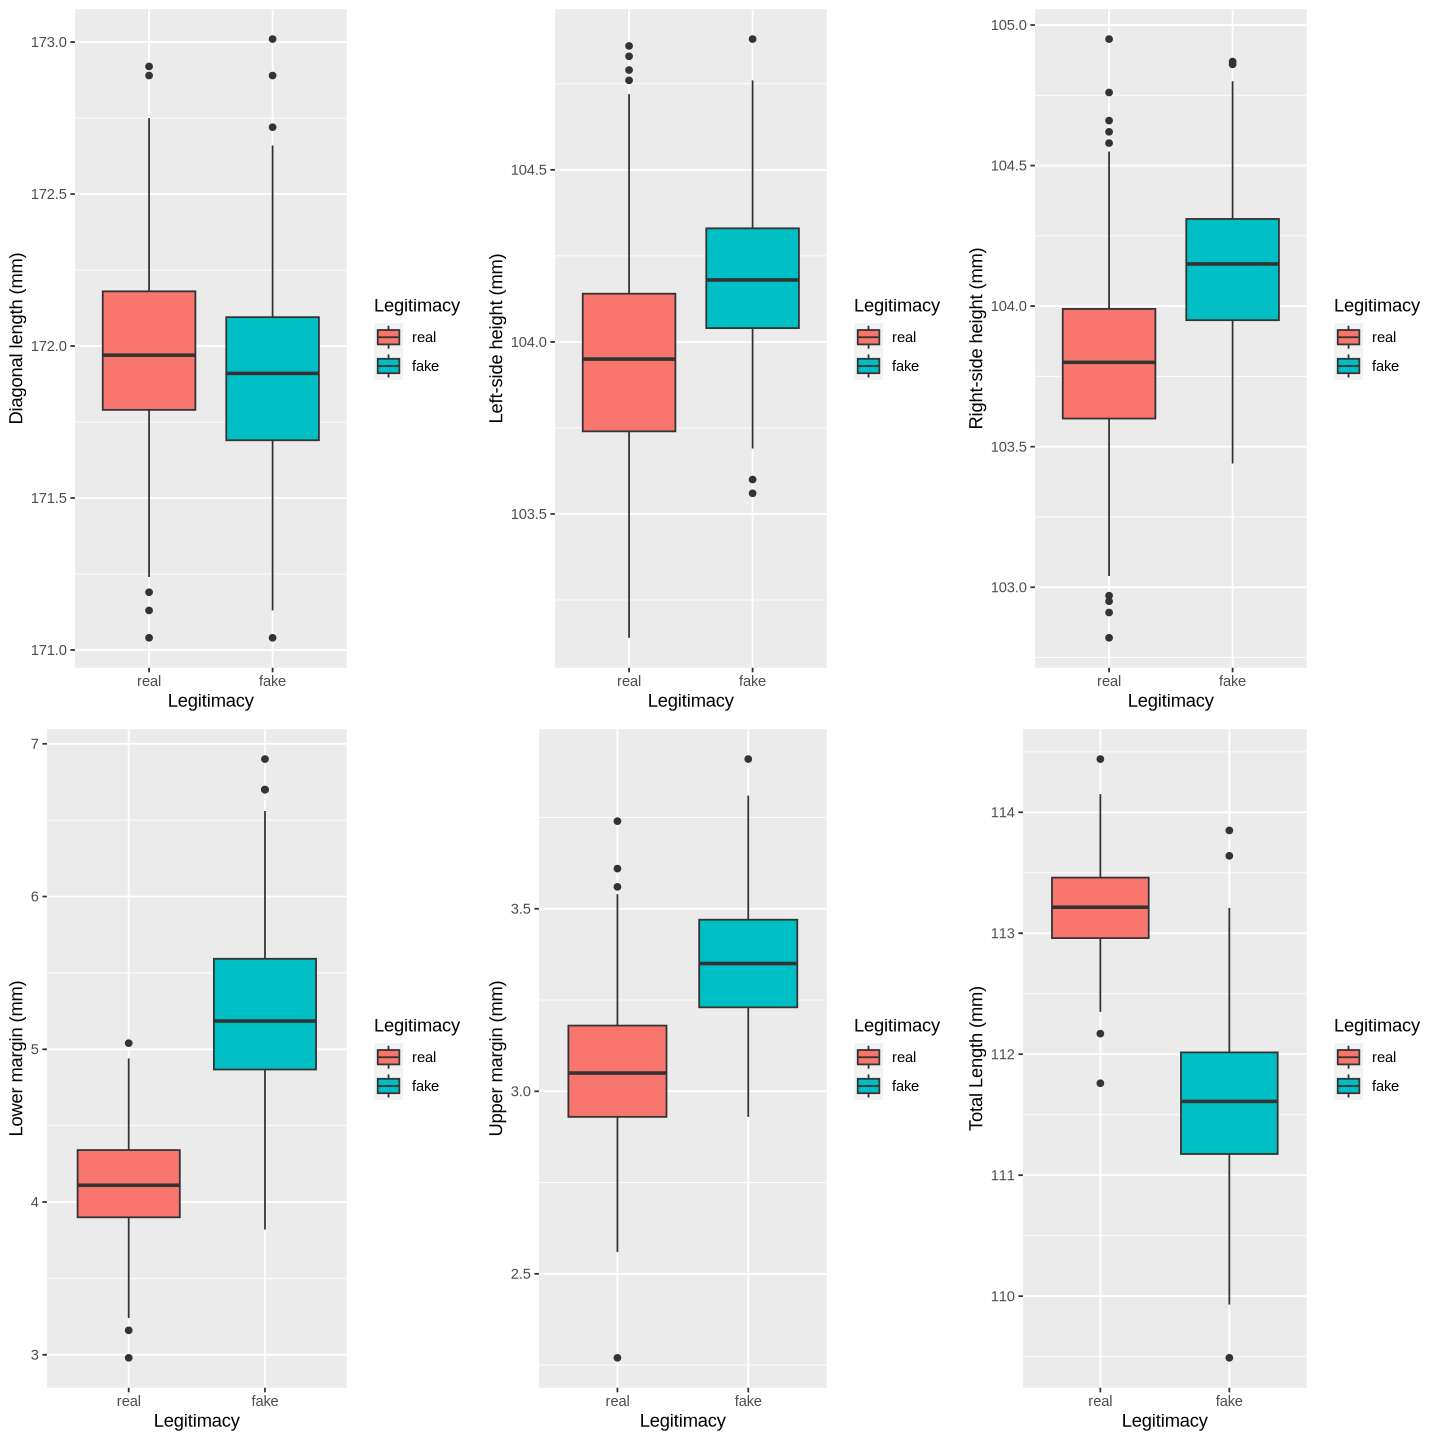

In [44]:
# initializing list for plots
all_plots <- list()

# the legitimacy variable has been added as both the x-variable as well as the fill
# variable in order to encourage redundacy to make the plot more clear.

#boxplot for diagonal length
diag_plot <- bills_training |>
        ggplot(aes(x = is_genuine, y = diagonal, fill = is_genuine)) +
        geom_boxplot() +
        labs(x = "Legitimacy", y = "Diagonal length (mm)", fill = "Legitimacy")
all_plots <- c(all_plots, list(diag_plot))

#boxplot for left-side height
lsh_plot <- bills_training |>
        ggplot(aes(x = is_genuine, y = height_left, fill = is_genuine)) +
        geom_boxplot() +
        labs(x = "Legitimacy", y = "Left-side height (mm)", fill = "Legitimacy")
all_plots <- c(all_plots, list(lsh_plot))

#boxplot for right-side height
rsh_plot <- bills_training |>
        ggplot(aes(x = is_genuine, y = height_right, fill = is_genuine)) +
        geom_boxplot() +
        labs(x = "Legitimacy", y = "Right-side height (mm)", fill = "Legitimacy")
all_plots <- c(all_plots, list(rsh_plot))

#boxplot for lower margin
lower_margin_plot <- bills_training |>
        ggplot(aes(x = is_genuine, y = margin_low, fill = is_genuine)) +
        geom_boxplot() +
        labs(x = "Legitimacy", y = "Lower margin (mm)", fill = "Legitimacy")
all_plots <- c(all_plots, list(lower_margin_plot))

#boxplot for upper margin
upper_margin_plot <- bills_training |>
        ggplot(aes(x = is_genuine, y = margin_up, fill = is_genuine)) +
        geom_boxplot() +
        labs(x = "Legitimacy", y = "Upper margin (mm)", fill = "Legitimacy")
all_plots <- c(all_plots, list(upper_margin_plot))

#boxplot for total length
length_plot <- bills_training |>
        ggplot(aes(x = is_genuine, y = length, fill = is_genuine)) +
        geom_boxplot() +
        labs(x = "Legitimacy", y = "Total Length (mm)", fill = "Legitimacy")
all_plots <- c(all_plots, list(length_plot))

# arranging all plots in a grid with three columns
plot_grid(plotlist = all_plots, ncol = 3)

options(repr.plot.width = 12, repr.plot.height = 12)

*Figure 4: Boxplots for all predictor variables with reference to legitimacy*

## Method

Our project aims to conduct data analysis by classification through the KNN algorithm, using the ‘tidymodels’ library. 
We will be using the columns ‘height_left’, ‘height_right’, ‘margin_low’, ‘margin_upper’, and ‘length’. Referring to *figure 4*, the difference of measurements of these columns between the genuine and fake bills is significant enough to use them as predictors between real and fake bills. We will not be using the ‘diagonal’ column, as both the real and fake bills exhibit too similar of values for the diagonal measurement for it to be an accurate determining factor. Bills will be classified based on the class values of the column ‘is_genuine’; the classification factors consist of ‘real’ if the bill is genuine, and ‘fake’ if not.

It can be observed in *figure 3* that there is a significantly greater number of real bills as compared to fake. This disparity can be addressed by making synthetic fake bills data. Additionally, when producing the model, all predictor variables will be centered and scaled (the variables differ in magnitude as seen in *figure 2*) to ensure that they are all equally accounted for. The classifier will be tuned by applying 5-fold cross-validation with different k-values. In order to choose the best k-value, we will produce a plot depicting k vs. accuracy.

## Expected Outcome and Significance

We expect to produce a classfication model that can accurately predict the legitimacy of a bill, given its dimensions. As such, our analysis should reveal the relationships between a bill's dimensions and it's legitimacy. The impact this model could have is beneficial to the identification of fake bills. This is important because the production and use of fake bills is associated with harmful inflation in a given market. Our analysis may bring about further questions, such as the following:

- What are the limitations of our model?
- What are other properties of a bill that could be taken into consideration in order to produce a more accurate model?
- What other classification techniques could be implemented to produce a more accurate model?